In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Hyperparameters
latent_dim = 100  # Dimension of noise vector
hidden_dim = 128  # Hidden layer dimension
num_epochs = 100  # Number of epochs for training
batch_size = 64   # Batch size for training
learning_rate = 0.0002  # Learning rate

# Data loader for MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
mnist = dsets.MNIST(root='./data', train=True, transform=transform, download=True)
data_loader = torch.utils.data.DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True)

# Generator Model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 28 * 28),  # Output size for MNIST images
            nn.Tanh()  # Tanh activation to output values between -1 and 1
        )

    def forward(self, z):
        return self.model(z)

# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28 * 28, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()  # Sigmoid activation to output probability of real/fake
        )

    def forward(self, img):
        return self.model(img)

# Initialize models
generator = Generator()
discriminator = Discriminator()

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate)

# Loss function
criterion = nn.BCELoss()  # Binary Cross Entropy Loss

def plot_generated_images(generator, epoch, latent_dim, num_images=25):
    """Function to plot generated images from the generator."""
    z = torch.randn(num_images, latent_dim)  # Generate random noise
    with torch.no_grad():
        generated_images = generator(z).view(-1, 1, 28, 28)  # Reshape for plotting

    # Convert images to numpy for plotting
    generated_images = generated_images.numpy()

    # Set up the figure for plotting
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
    for i in range(5):
        for j in range(5):
            axes[i][j].imshow(generated_images[i * 5 + j][0], cmap='gray')
            axes[i][j].axis('off')

    plt.suptitle(f'Generated Images at Epoch {epoch+1}', fontsize=16)
    plt.show()

# Training Loop
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(data_loader):
        # Prepare real and fake labels with current batch size
        current_batch_size = real_images.size(0)
        real_labels = torch.ones(current_batch_size, 1)  # Real images labeled as 1
        fake_labels = torch.zeros(current_batch_size, 1)  # Fake images labeled as 0

        # Train Discriminator
        optimizer_D.zero_grad()

        outputs = discriminator(real_images.view(-1, 28 * 28))
        d_loss_real = criterion(outputs, real_labels)

        z = torch.randn(current_batch_size, latent_dim)
        fake_images = generator(z)

        outputs = discriminator(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()

        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)  # We want generator to fool the discriminator

        g_loss.backward()
        optimizer_G.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')

    # Plot generated images after every epoch


Epoch [1/100], d_loss: 0.9320, g_loss: 0.8658
Epoch [2/100], d_loss: 0.4949, g_loss: 1.5866
Epoch [3/100], d_loss: 0.8728, g_loss: 1.1162
Epoch [4/100], d_loss: 1.0772, g_loss: 0.9722
Epoch [5/100], d_loss: 1.2784, g_loss: 0.7457
Epoch [6/100], d_loss: 1.3567, g_loss: 0.8134
Epoch [7/100], d_loss: 0.9745, g_loss: 1.0539
Epoch [8/100], d_loss: 0.9537, g_loss: 1.0576
Epoch [9/100], d_loss: 1.0931, g_loss: 1.0592
Epoch [10/100], d_loss: 0.6221, g_loss: 1.5154
Epoch [11/100], d_loss: 1.6037, g_loss: 0.6360
Epoch [12/100], d_loss: 0.9629, g_loss: 1.3643
Epoch [13/100], d_loss: 0.4948, g_loss: 1.7360
Epoch [14/100], d_loss: 1.3325, g_loss: 0.9489
Epoch [15/100], d_loss: 0.9170, g_loss: 1.2848
Epoch [16/100], d_loss: 1.3927, g_loss: 0.7579
Epoch [17/100], d_loss: 1.0077, g_loss: 1.3175
Epoch [18/100], d_loss: 1.2589, g_loss: 1.0031
Epoch [19/100], d_loss: 0.7828, g_loss: 1.0894
Epoch [20/100], d_loss: 0.8588, g_loss: 1.5069
Epoch [21/100], d_loss: 0.6816, g_loss: 1.4442
Epoch [22/100], d_loss

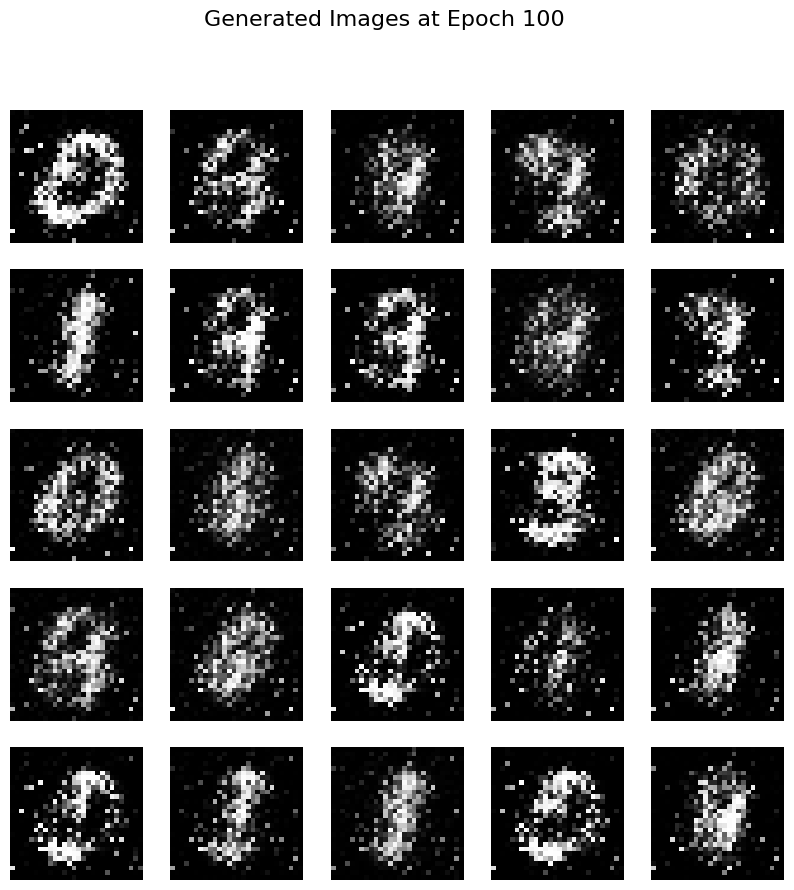

In [ ]:
plot_generated_images(generator, epoch, latent_dim)
